In [299]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [301]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirQualityUCI.csv', sep=";", decimal=",", header=0)

In [302]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

Shape of the dataset

In [303]:
print("No of rows :",df.shape[0])
print("No of columns :",df.shape[1])

No of rows : 9471
No of columns : 17


In [304]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [305]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [306]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  Unnamed: 15  Unnamed: 16  
count  9357.000000  9357.000000  9357.000000          0.0          0.0  
mean      9.778305    39.485380    -6.837604          NaN          NaN  
std      43.203623    51.216145    38.976670          NaN          NaN  
min    -200.000000  -200.000000  -200.000000          NaN          NaN  
25%      10.900000    34.100000     0.692300          NaN          NaN  
50%      17.200000    48.600000     0.976800          NaN          NaN  
75%      24.100000    61.900000     1.296200          NaN          NaN  
max      44.600000    88.700000     2.231000          NaN          NaN

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


Count Null Value

In [308]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

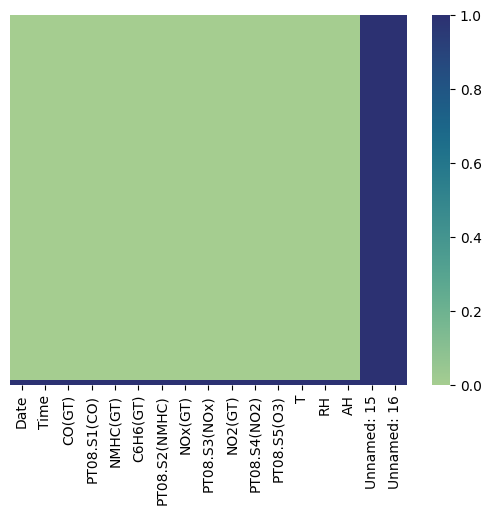

In [309]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

In [310]:
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13.6  48.9  0.7578          NaN          NaN  
1           972.0  13.3  47.7  0.7255          NaN          NaN  
2          1074.0  11.9  54.0  0.7502          NaN          NaN  
3          1203.0  11.0  60.0  0.7867          NaN          NaN  
4          1110.0  11.2  59.6  0.7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9466          NaN   NaN   NaN     NaN          NaN          NaN  
9467          NaN   NaN   NaN     NaN          NaN          NaN  
9468          NaN   NaN   NaN     NaN          NaN          NaN  
9469          NaN   NaN   NaN     NaN          NaN          NaN  
9470          NaN   NaN   NaN     NaN          NaN          NaN  

[9471 rows x 17 columns]

In [311]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.hour
df['Month'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.month

In [312]:
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'],inplace=True)

In [313]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Hour  Month  
0  13.6  48.9  0.7578  18.0    3.0  
1  13.3  47.7  0.7255  19.0    3.0  
2  11.9  54.0  0.7502  20.0    3.0  
3  11.0  60.0  0.7867  21.0    3.0  
4  11.2  59.6  0.7888  22.0    3.0

In [314]:
df.dropna(inplace=True)

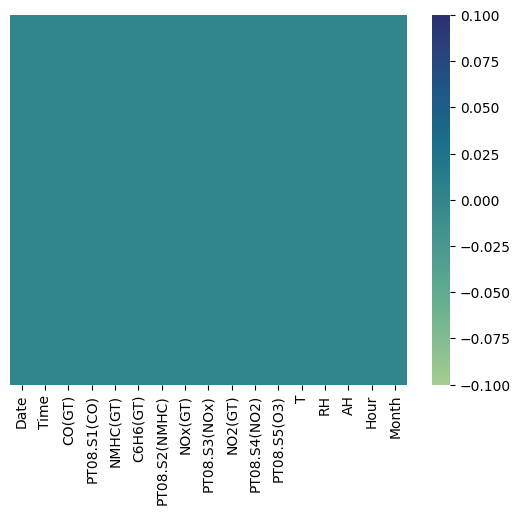

In [315]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

In [316]:
df.replace(to_replace=-200,value=np.nan,inplace=True)

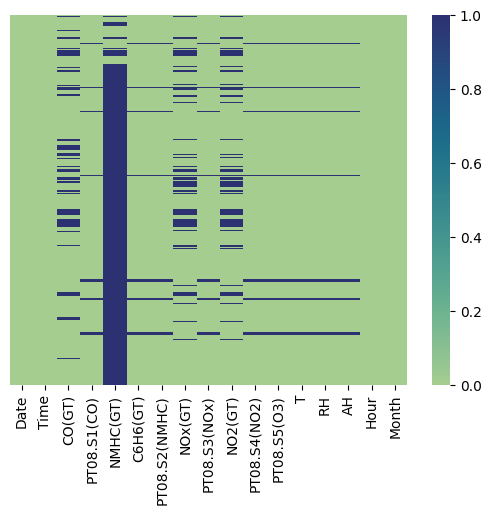

In [317]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

In [318]:
df.drop(columns=['NMHC(GT)'],inplace=True)

In [319]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Hour                0
Month               0
dtype: int64

In [320]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1  10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2  10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3  10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4  10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  Hour  Month  
0  0.7578  18.0    3.0  
1  0.7255  19.0    3.0  
2  0.7502  20.0    3.0  
3  0.7867  21.0    3.0  
4  0.7888  22.0    3.0

In [321]:
# col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH','Hour']
col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
df = df[col]
df[col].dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [322]:
df[col].head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888

In [323]:
for i in col:
    df.loc[:, i] = df[i].fillna(df[i].mean())

In [324]:
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Plotting a boxplot

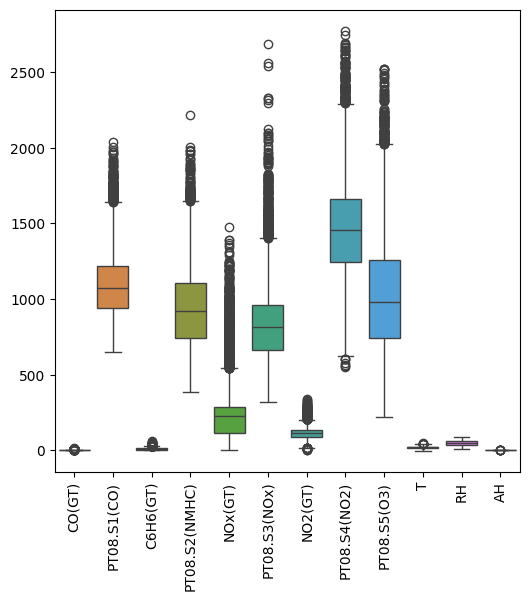

In [325]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

In [326]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


values  behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,


In [327]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

CO(GT)           454
PT08.S1(CO)      145
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64

Making the value

In [328]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

In [329]:
df = df.copy()
for i in mask.columns:
    mean_value = df[i].astype('float').mean()
    df.loc[mask[i], i] = mean_value


In [330]:
((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

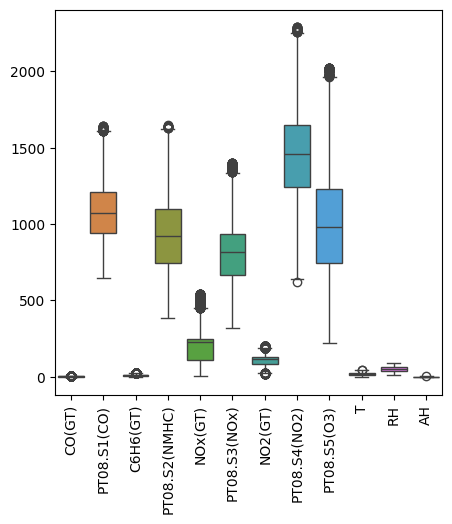

In [331]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

In [332]:
df.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888

In [333]:
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [334]:
df.shape

(9357, 12)

 Correlation between all the features

In [335]:
df.corr()


CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.685757  0.743674       0.718041  0.572978   
PT08.S1(CO)    0.685757     1.000000  0.822775       0.855978  0.483538   
C6H6(GT)       0.743674     0.822775  1.000000       0.925141  0.468514   
PT08.S2(NMHC)  0.718041     0.855978  0.925141       1.000000  0.483476   
NOx(GT)        0.572978     0.483538  0.468514       0.483476  1.000000   
PT08.S3(NOx)  -0.595999    -0.762376 -0.728630      -0.773642 -0.547020   
NO2(GT)        0.568398     0.517836  0.512983       0.534065  0.687897   
PT08.S4(NO2)   0.483957     0.622235  0.700050       0.728152  0.088776   
PT08.S5(O3)    0.669750     0.855440  0.801620       0.845278  0.559868   
T              0.069789     0.057359  0.232799       0.251260 -0.195430   
RH            -0.009705     0.104732 -0.106323      -0.106357  0.141368   
AH             0.051797     0.134151  0.159235       0.182338 -0.112401   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)            -0.595999  0.568398      0.483957     0.669750  0.069789   
PT08.S1(CO)       -0.762376  0.517836      0.622235     0.855440  0.057359   
C6H6(GT)          -0.728630  0.512983      0.700050     0.801620  0.232799   
PT08.S2(NMHC)     -0.773642  0.534065      0.728152     0.845278  0.251260   
NOx(GT)           -0.547020  0.687897      0.088776     0.559868 -0.195430   
PT08.S3(NOx)       1.000000 -0.516597     -0.485194    -0.778741 -0.090612   
NO2(GT)           -0.516597  1.000000      0.128650     0.563019 -0.108259   
PT08.S4(NO2)      -0.485194  0.128650      1.000000     0.540654  0.581923   
PT08.S5(O3)       -0.778741  0.563019      0.540654     1.000000 -0.009658   
T                 -0.090612 -0.108259      0.581923    -0.009658  1.000000   
RH                -0.085278 -0.109464     -0.047436     0.120836 -0.574593   
AH                -0.196666 -0.249051      0.635018     0.089068  0.658621   

                     RH        AH  
CO(GT)        -0.009705  0.051797  
PT08.S1(CO)    0.104732  0.134151  
C6H6(GT)      -0.106323  0.159235  
PT08.S2(NMHC) -0.106357  0.182338  
NOx(GT)        0.141368 -0.112401  
PT08.S3(NOx)  -0.085278 -0.196666  
NO2(GT)       -0.109464 -0.249051  
PT08.S4(NO2)  -0.047436  0.635018  
PT08.S5(O3)    0.120836  0.089068  
T             -0.574593  0.658621  
RH             1.000000  0.166707  
AH             0.166707  1.000000

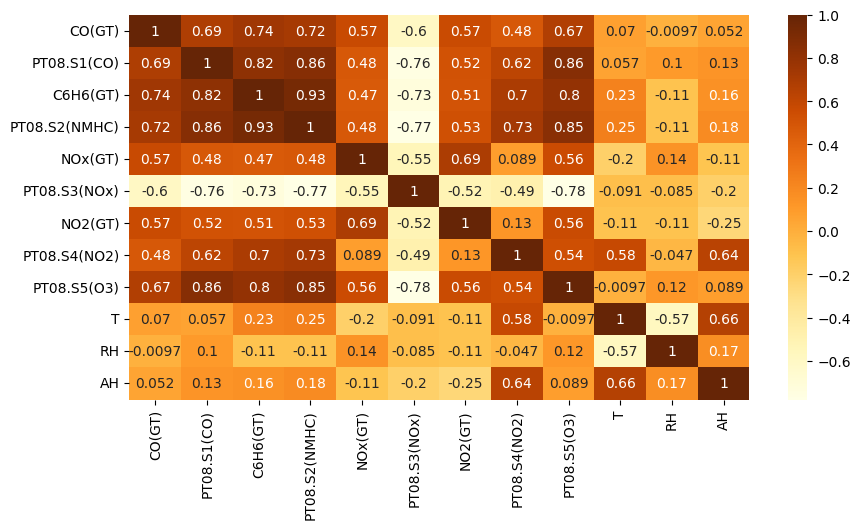

In [336]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlOrBr',annot=True)
plt.show()

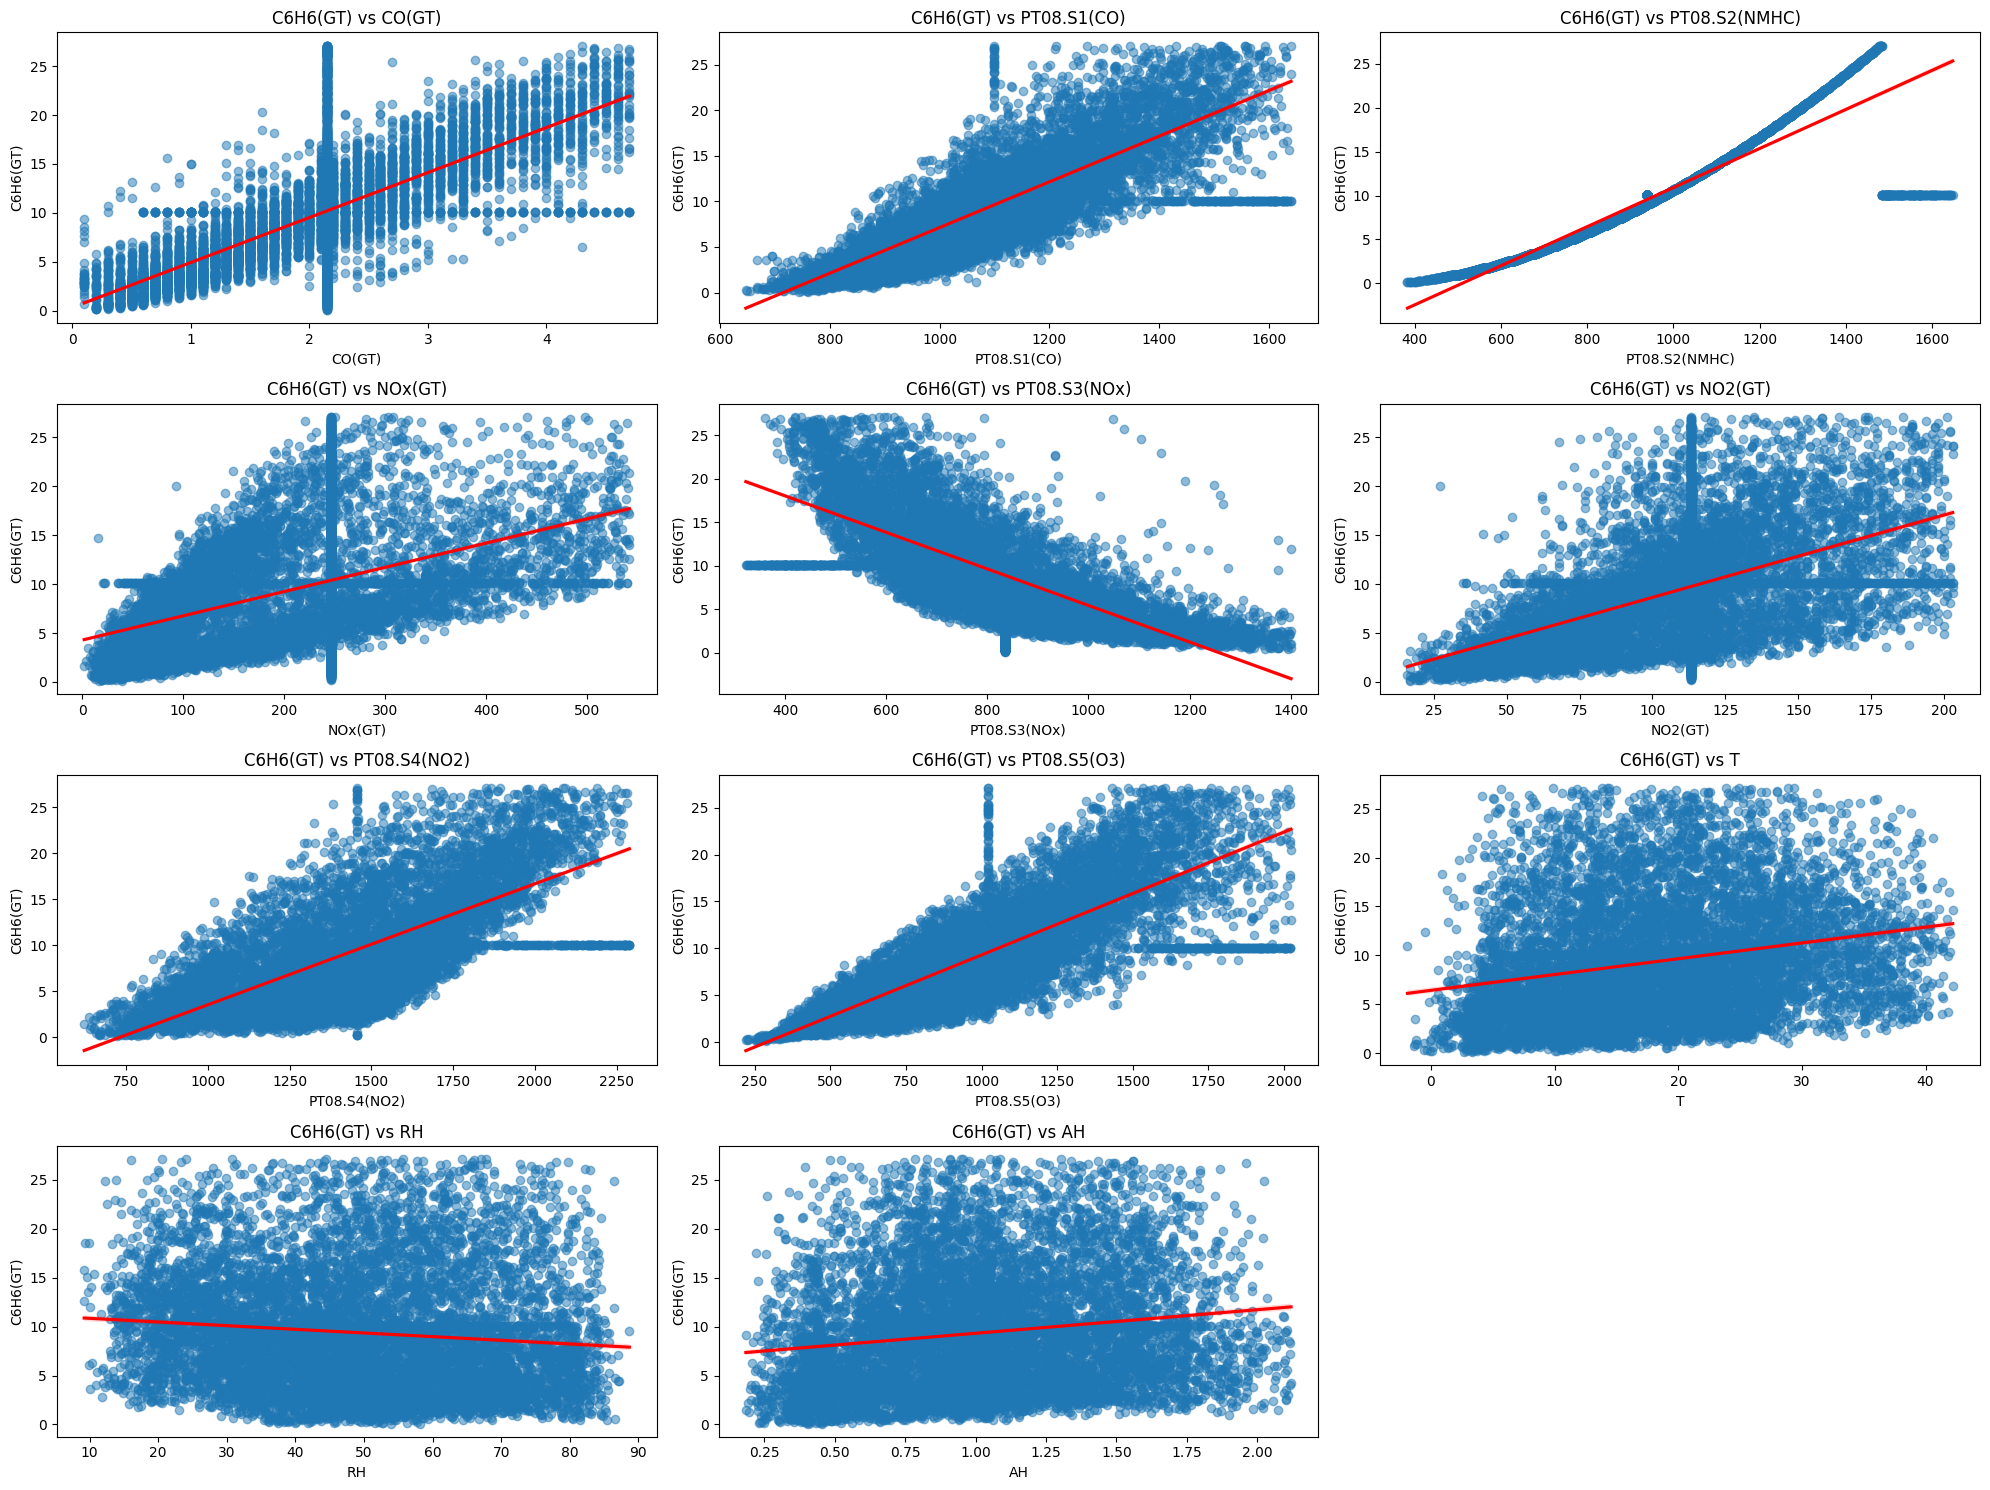

In [337]:
features = df.columns.drop('C6H6(GT)')
plt.figure(figsize=(20, 15))
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.regplot(x=df[feature], y=df['C6H6(GT)'], line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
    plt.title(f'C6H6(GT) vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('C6H6(GT)')

plt.tight_layout()
plt.show()


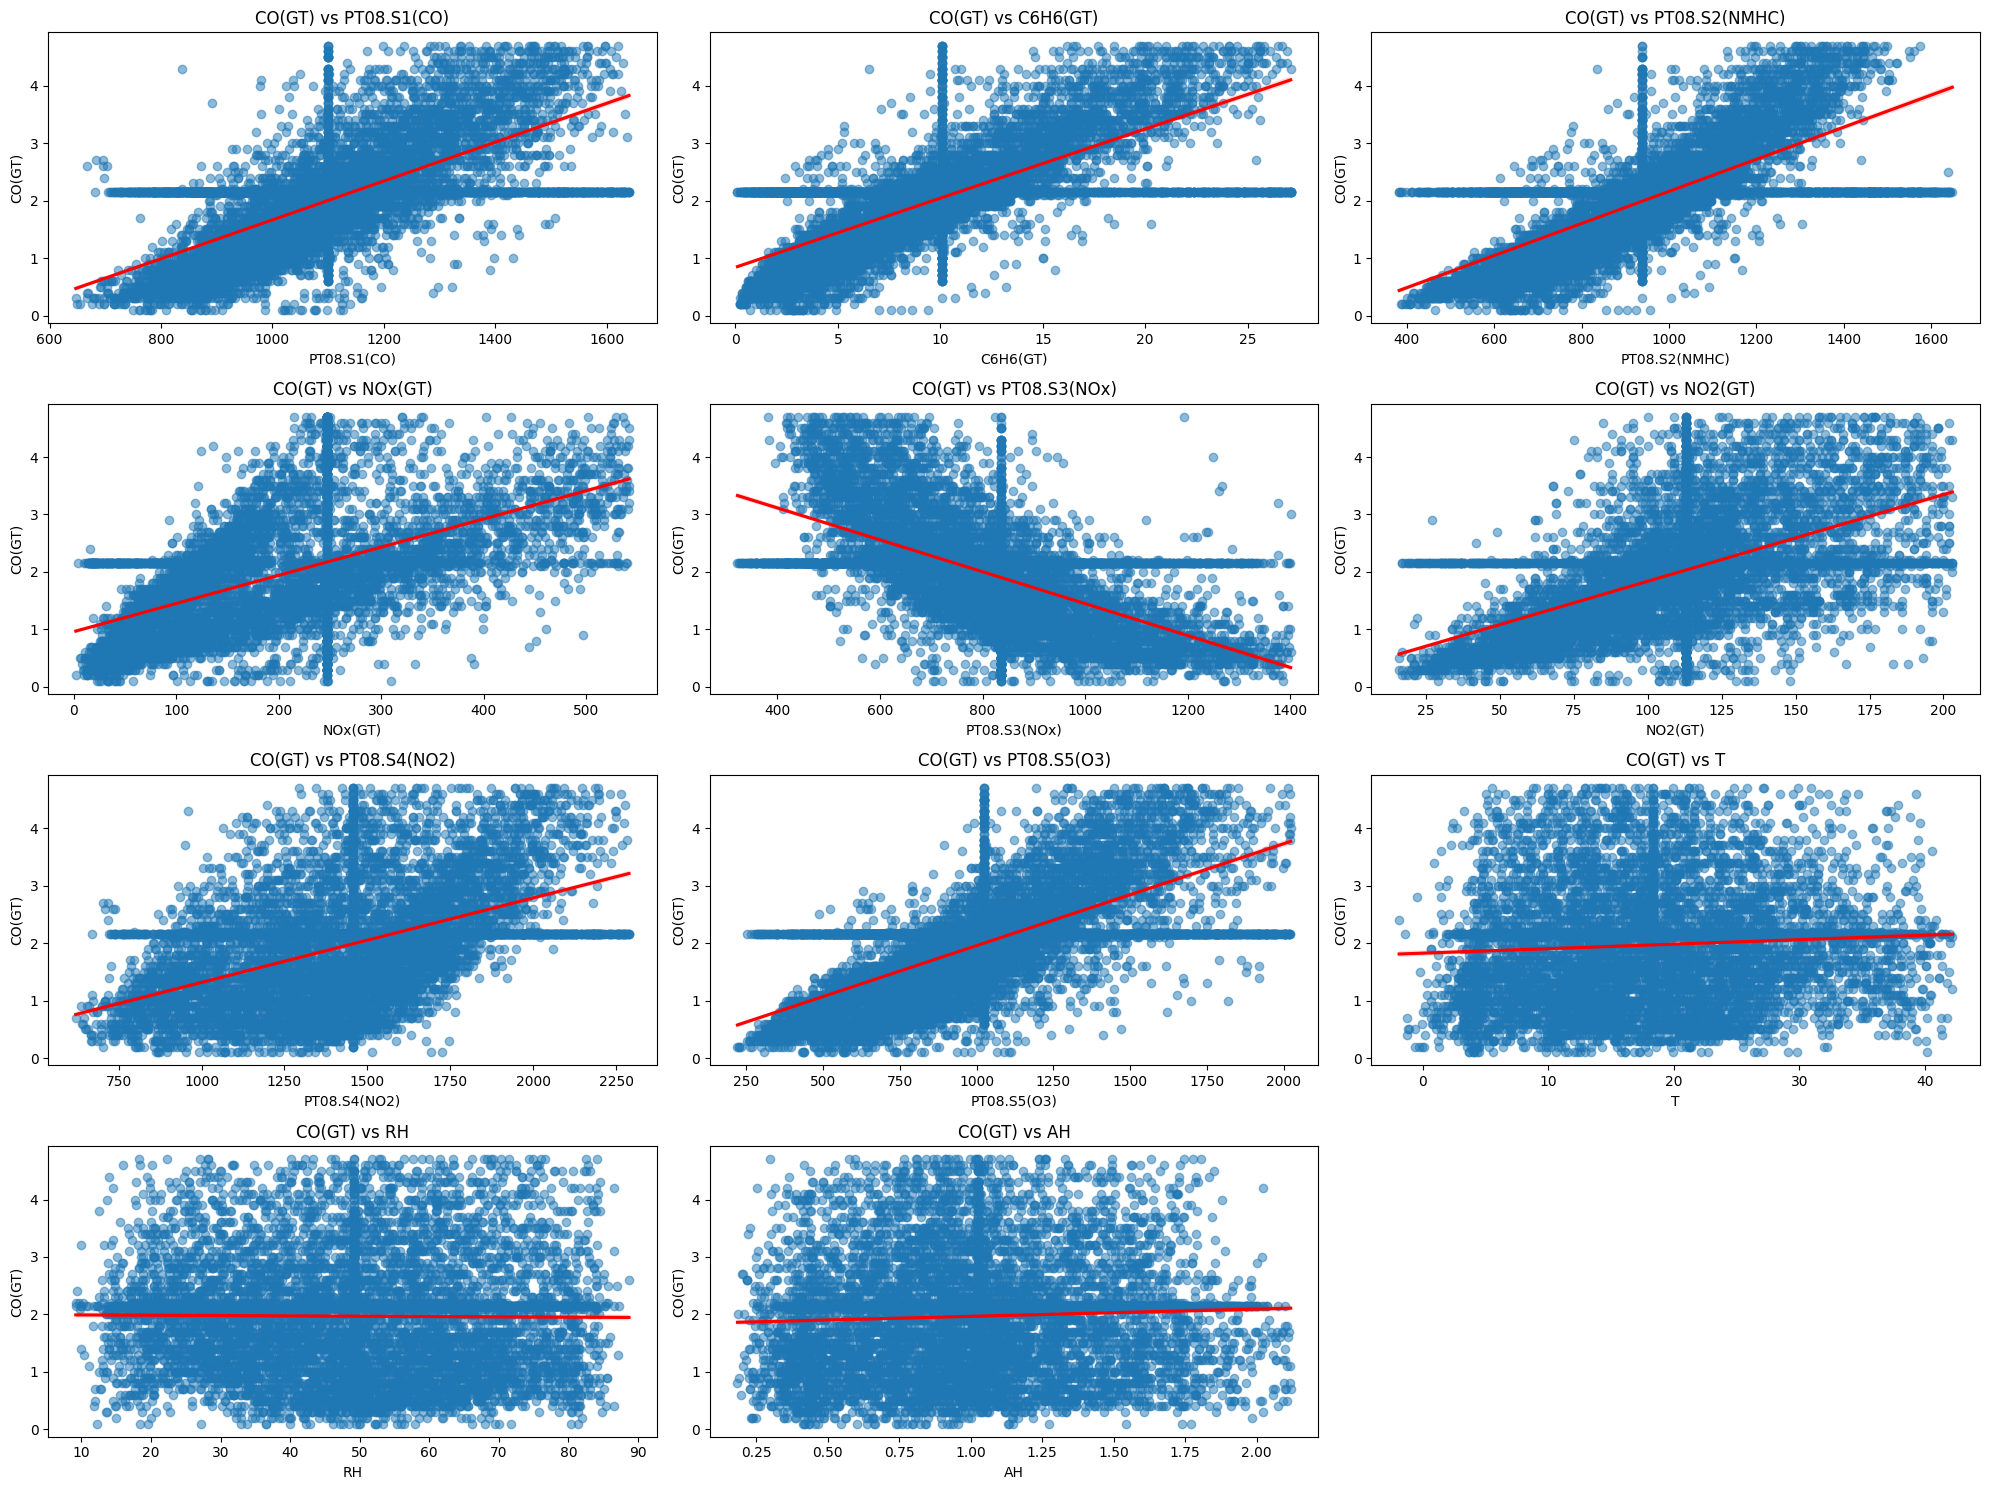

In [338]:
features = df.columns.drop('CO(GT)')
plt.figure(figsize=(20, 15))
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.regplot(x=df[feature], y=df['CO(GT)'], line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
    plt.title(f'CO(GT) vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('CO(GT)')

plt.tight_layout()
plt.show()


## Generate csv of training and testing data

In [339]:
train_ratio = 0.75
train_size = int(train_ratio * len(df))

train_df = df[:train_size]
test_df = df[train_size:]

train_df.to_csv('after_preprocess_train_data.csv', index=False)
test_df.to_csv('after_preprocess_test_data.csv', index=False)


In [340]:
# Columns like T, RH, and AH show weak correlations with other features. NO2(GT) and NOx(GT) have some correlation, but not as strong as CO(GT), C6H6(GT), and PT columns. CO(GT) and C6H6(GT) are highly
# correlated with other features and should be considered target variables.


Feature Scaling using Standardization,Function to calculate the cost (MSE)

In [341]:
for column in col:
    mean = df[column].mean()
    std_dev = df[column].std()
    df.loc[:, column] = (df[column] - mean) / std_dev

def compute_cost_with_regularization(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y)) + (lambda_/(2*m)) * np.sum(np.square(theta[1:]))
    return cost

def gradient_descent_with_regularization(X, y, theta, learning_rate, iterations, lambda_):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        theta[1:] = theta[1:] - (learning_rate/m) * (X[:, 1:].T.dot(predictions - y) + lambda_ * theta[1:])
        theta[0] = theta[0] - (learning_rate/m) * np.sum(predictions - y)
        cost_history[i] = compute_cost_with_regularization(X, y, theta, lambda_)

        if (i + 1) % 500 == 0:
            print(f"Iteration {i + 1}/{iterations}, Cost: {cost_history[i]}")

    return theta, cost_history

def linear_regression_with_regularization(X, y, learning_rate=0.01, iterations=1500, lambda_=0.1):
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    theta = np.zeros(X.shape[1])

    theta, cost_history = gradient_descent_with_regularization(X, y, theta, learning_rate, iterations, lambda_)

    return theta, cost_history

def compute_r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2_score = 1 - (ss_residual / ss_total)
    return r2_score

def evaluate_model_with_regularization(X_train, y_train, X_test, y_test, theta, lambda_):
    X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
    X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

    y_train_pred = X_train.dot(theta)
    y_test_pred = X_test.dot(theta)

    train_mse = np.mean(np.square(y_train_pred - y_train))
    test_mse = np.mean(np.square(y_test_pred - y_test))

    train_r2 = compute_r2_score(y_train, y_train_pred)
    test_r2 = compute_r2_score(y_test, y_test_pred)

    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)
    print("Train R²:", train_r2)
    print("Test R²:", test_r2)


In [342]:
df

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0     0.652847     1.378533  0.421808       0.462622 -0.352010      1.174296   
1     0.032347     1.031717  0.003306       0.096095 -0.909739      1.742562   
2     0.239181     1.592742 -0.063654       0.031651 -0.661859      1.578824   
3     0.239181     1.460136 -0.030174       0.067900 -0.298893      1.347665   
4    -0.381319     0.929713 -0.482156      -0.383210 -0.661859      1.891852   
...        ...          ...       ...            ...       ...           ...   
9352  1.169930     1.143922  0.689650       0.684150  2.356956     -1.315478   
9353  0.446014     0.373789  0.338108       0.386095  1.303469     -1.002450   
9354  0.446014     0.266684  0.505509       0.531095  0.772299     -1.007266   
9355  0.135764    -0.442247  0.020047       0.120262  0.258835     -0.530501   
9356  0.239181    -0.095432  0.421808       0.466650  0.524420     -0.761660   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0     0.116746      0.780408     0.715522 -0.544270 -0.019688 -0.676319  
1    -0.459896      0.362294    -0.095073 -0.579076 -0.090381 -0.758173  
2     0.144205      0.349719     0.184253 -0.741500  0.280757 -0.695579  
3     0.363879      0.440887     0.537519 -0.845916  0.634222 -0.603081  
4     0.199124      0.145378     0.282839 -0.822712  0.610658 -0.597759  
...        ...           ...          ...       ...       ...       ...  
9352  2.231101     -0.219293     1.977969  0.418675 -1.174341 -0.678853  
9353  1.929050     -0.565102     0.718260  0.697117 -1.504242 -0.792638  
9354  1.819214     -0.637407     0.233546  0.998762 -1.822360 -0.973326  
9355  1.297490     -1.266150    -0.648250  1.161187 -2.105132 -1.294409  
9356  1.627000     -0.989503    -0.522279  1.184390 -2.128697 -1.322538  

[9357 rows x 12 columns]

## Feature and target selection for C6H6(GT),train/test split (75% training and 25% testing)

In [343]:
X_c6h6 = df[['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']].values
y_c6h6 = df['C6H6(GT)'].values

train_ratio = 0.75
n_samples = X_c6h6.shape[0]
train_size = int(train_ratio * n_samples)

X_train_c6h6, X_test_c6h6 = X_c6h6[:train_size], X_c6h6[train_size:]
y_train_c6h6, y_test_c6h6 = y_c6h6[:train_size], y_c6h6[train_size:]

print(f"Training set: {X_train_c6h6.shape}, Testing set: {X_test_c6h6.shape}")



Training set: (7017, 7), Testing set: (2340, 7)


## Feature and target selection for CO(GT),train/test split (75% training and 25% testing)

In [344]:
X_co = df[['C6H6(GT)', 'PT08.S1(CO)', 'NOx(GT)','PT08.S2(NMHC)', 'NO2(GT)','PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']].values
y_co = df['CO(GT)'].values

train_ratio = 0.75
ns = X_co.shape[0]
train_size = int(train_ratio * ns)

X_train_co, X_test_co = X_co[:train_size], X_co[train_size:]
y_train_co, y_test_co = y_co[:train_size], y_co[train_size:]

print(f"Training set: {X_train_co.shape}, Testing set: {X_test_co.shape}")


Training set: (7017, 8), Testing set: (2340, 8)


In [345]:
iterations_array = [1000, 2000, 3000]
learning_rates_array = [0.001, 0.01, 0.1]
lambda_values = [0.1, 1, 10,15,20,50]


In [346]:
best_theta_c6h6 = None
best_mse_c6h6 = float('inf')
best_r2_c6h6 = -float('inf')
best_cost_history_c6h6 = None
best_learning = None
best_iteration = None
best_lambda = None

print("Tuning hyperparameters for C6H6(GT)...")
for iterations in iterations_array:
    for learning_rate in learning_rates_array:
        for lambda_ in lambda_values:
            print(f"Testing with learning rate: {learning_rate}, iterations: {iterations}, lambda: {lambda_}")
            theta_c6h6, cost_history = linear_regression_with_regularization(X_train_c6h6, y_train_c6h6, learning_rate, iterations, lambda_)
            y_test_pred_c6h6 = np.concatenate([np.ones((X_test_c6h6.shape[0], 1)), X_test_c6h6], axis=1).dot(theta_c6h6)

            test_mse = np.mean(np.square(y_test_pred_c6h6 - y_test_c6h6))
            test_r2 = compute_r2_score(y_test_c6h6, y_test_pred_c6h6)

            if test_mse < best_mse_c6h6:
                best_mse_c6h6 = test_mse
                best_r2_c6h6 = test_r2
                best_theta_c6h6 = theta_c6h6
                best_cost_history_c6h6 = cost_history
                best_iteration = iterations
                best_learning = learning_rate
                best_lambda = lambda_

print(f"\nBest model for C6H6(GT): MSE = {best_mse_c6h6}, R² = {best_r2_c6h6}, Best Iteration = {best_iteration}, Best Learning Rate = {best_learning}, Best Lambda = {best_lambda}")


Tuning hyperparameters for C6H6(GT)...
Testing with learning rate: 0.001, iterations: 1000, lambda: 0.1
Iteration 500/1000, Cost: 0.08913763201402704
Iteration 1000/1000, Cost: 0.08305832528835295
Testing with learning rate: 0.001, iterations: 1000, lambda: 1
Iteration 500/1000, Cost: 0.08914849734185007
Iteration 1000/1000, Cost: 0.08307020375344523
Testing with learning rate: 0.001, iterations: 1000, lambda: 10
Iteration 500/1000, Cost: 0.08925712115853335
Iteration 1000/1000, Cost: 0.08318894886954104
Testing with learning rate: 0.001, iterations: 1000, lambda: 15
Iteration 500/1000, Cost: 0.08931744458597468
Iteration 1000/1000, Cost: 0.08325488733531725
Testing with learning rate: 0.001, iterations: 1000, lambda: 20
Iteration 500/1000, Cost: 0.08937775149455619
Iteration 1000/1000, Cost: 0.08332080364264231
Testing with learning rate: 0.001, iterations: 1000, lambda: 50
Iteration 500/1000, Cost: 0.08973924639631338
Iteration 1000/1000, Cost: 0.08371583683159146
Testing with learni

In [347]:
best_theta_co = None
best_mse_co = float('inf')
best_r2_co = -float('inf')
best_cost_history_co = None
best_learning = None
best_iteration = None
best_lambda = None

print("\nTuning hyperparameters for CO(GT)...")
for iterations in iterations_array:
    for learning_rate in learning_rates_array:
        for lambda_ in lambda_values:
            print(f"Testing with learning rate: {learning_rate}, iterations: {iterations}, lambda: {lambda_}")
            theta_co, cost_history = linear_regression_with_regularization(X_train_co, y_train_co, learning_rate, iterations, lambda_)
            y_test_pred_co = np.concatenate([np.ones((X_test_co.shape[0], 1)), X_test_co], axis=1).dot(theta_co)

            test_mse = np.mean(np.square(y_test_pred_co - y_test_co))
            test_r2 = compute_r2_score(y_test_co, y_test_pred_co)

            if test_mse < best_mse_co:
                best_mse_co = test_mse
                best_r2_co = test_r2
                best_theta_co = theta_co
                best_cost_history_co = cost_history
                best_iteration = iterations
                best_learning = learning_rate
                best_lambda = lambda_

print(f"Best model for CO(GT): MSE = {best_mse_co}, R² = {best_r2_co}, Best Iteration = {best_iteration}, Best Learning Rate = {best_learning}, Best Lambda = {best_lambda}")


Tuning hyperparameters for CO(GT)...
Testing with learning rate: 0.001, iterations: 1000, lambda: 0.1
Iteration 500/1000, Cost: 0.18407261649625162
Iteration 1000/1000, Cost: 0.1775906358495031
Testing with learning rate: 0.001, iterations: 1000, lambda: 1
Iteration 500/1000, Cost: 0.18408006184392747
Iteration 1000/1000, Cost: 0.17759920943767815
Testing with learning rate: 0.001, iterations: 1000, lambda: 10
Iteration 500/1000, Cost: 0.18415449596711073
Iteration 1000/1000, Cost: 0.1776849144913245
Testing with learning rate: 0.001, iterations: 1000, lambda: 15
Iteration 500/1000, Cost: 0.1841958330584782
Iteration 1000/1000, Cost: 0.17773250420554274
Testing with learning rate: 0.001, iterations: 1000, lambda: 20
Iteration 500/1000, Cost: 0.18423715929825318
Iteration 1000/1000, Cost: 0.17778007664462564
Testing with learning rate: 0.001, iterations: 1000, lambda: 50
Iteration 500/1000, Cost: 0.18448488907617883
Iteration 1000/1000, Cost: 0.17806514910896967
Testing with learning r

Evaluation the best thetas

In [348]:
print("\nFinal evaluation using the best models:")
print("C6H6(GT) - Best Theta:", best_theta_c6h6)
print("CO(GT) - Best Theta:", best_theta_co)


Final evaluation using the best models:
C6H6(GT) - Best Theta: [-0.011762    0.17961289  0.0384436   0.65211708 -0.01852253  0.01160562
  0.10791257  0.02347771]
CO(GT) - Best Theta: [ 0.02053034  0.16536226  0.12651092  0.15266831  0.12033446  0.15616224
 -0.06717485  0.06937074  0.09264424]


Plotting cost history for the best model for C6H6(GT)

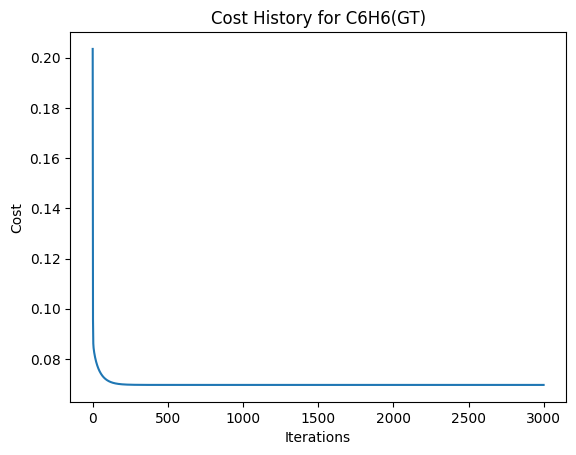

In [349]:
plt.plot(best_cost_history_c6h6)
plt.title("Cost History for C6H6(GT)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


Plotting cost history for the best model for CO(GT)

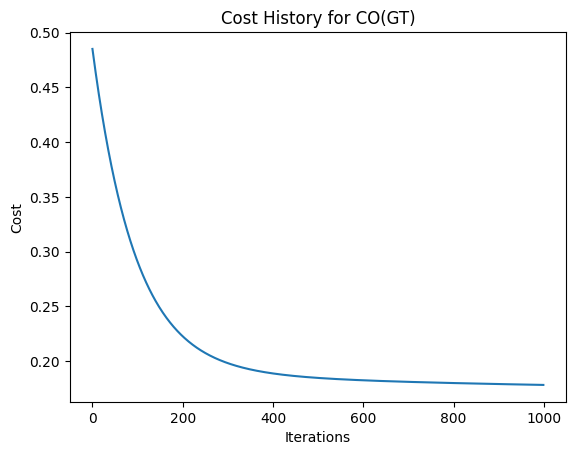

In [350]:
plt.plot(best_cost_history_co)
plt.title("Cost History for CO(GT)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

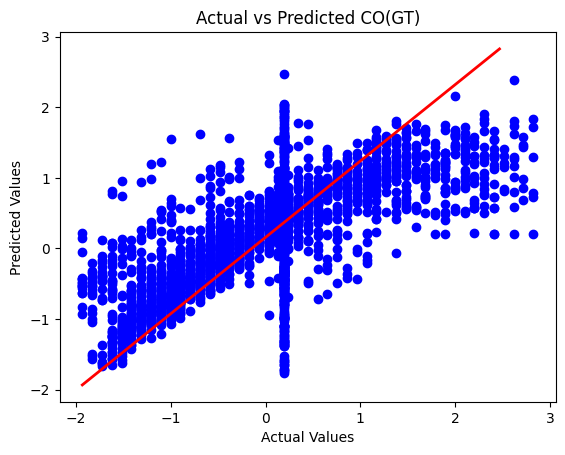

In [351]:
plt.scatter(y_test_co, y_test_pred_co, color='blue')
plt.plot([min(y_test_co), max(y_test_pred_co)], [min(y_test_co), max(y_test_co)], color='red', linewidth=2)
plt.title('Actual vs Predicted CO(GT)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

df.to_csv('processed_air_quality_data.csv', index=False)

report = {
    'Training MSE': best_mse_co,
    'Testing MSE': test_mse
}
report_df = pd.DataFrame(report, index=[0])
report_df.to_csv('report_air_quality_co.csv', index=False)

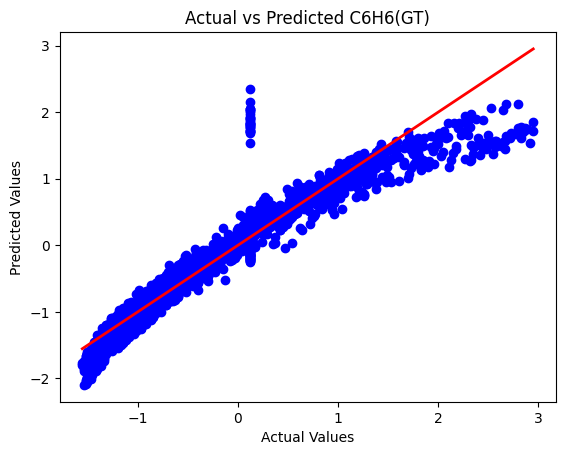

In [352]:
plt.scatter(y_test_c6h6, y_test_pred_c6h6, color='blue')
plt.plot([min(y_test_c6h6), max(y_test_c6h6)], [min(y_test_c6h6), max(y_test_c6h6)], color='red', linewidth=2)
plt.title('Actual vs Predicted C6H6(GT)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

report_c6h6 = {
    'Training MSE': best_mse_c6h6,
    'Testing MSE': test_mse
}
report_c6h6_df = pd.DataFrame(report_c6h6, index=[0])
report_c6h6_df.to_csv('report_air_quality_c6h6.csv', index=False)


## Logistic Regression(Smarket.csv)

In [353]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Smarket.csv')

In [354]:
df2.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

In [355]:
print("No of rows :",df2.shape[0])
print("No of columns :",df2.shape[1])

No of rows : 1250
No of columns : 9


In [356]:
df2.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [357]:
df2.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

In [358]:
df2.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  
75%       0.59700     1.641675     0.596750  
max       5.73300     3.152470     5.733000

In [359]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [360]:
df2.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [361]:
def custom_label_encoder(labels):
    unique_labels = list(set(labels))
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    return np.array([label_map[label] for label in labels]), label_map

In [362]:
df2['Direction'], label_map = custom_label_encoder(df2['Direction'])

X = df2.drop(['Year', 'Direction'], axis=1).to_numpy()
y = df2['Direction'].to_numpy()

In [363]:
split_index = int(len(df2) * 0.75)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

def custom_standard_scaler(data, fit_data=None):
    if fit_data is None:
        fit_data = data
    mean = fit_data.mean(axis=0)
    std = fit_data.std(axis=0)
    return (data - mean) / std

In [364]:
X_train = custom_standard_scaler(X_train)
X_test = custom_standard_scaler(X_test, fit_data=X_train)

In [365]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    reg_cost = (lambda_ / (2 * m)) * np.sum(weights[1:] ** 2)
    return cost + reg_cost

def gradient_descent(X, y, weights, learning_rate, lambda_, iterations):
    m = len(y)
    gradients = []
    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        gradient[1:] += (lambda_ / m) * weights[1:]
        gradients.append(gradient)
        weights -= learning_rate * gradient
    return weights,gradients

def custom_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

In [366]:
weights = np.zeros(X_train.shape[1])
learning_rate = 0.1
lambda_ = 0.01
iterations = 3000

In [367]:
weights, gradients = gradient_descent(X_train, y_train, weights, learning_rate, lambda_, iterations)

In [368]:
y_pred_train = sigmoid(np.dot(X_train, weights)) >= 0.5
y_pred_test = sigmoid(np.dot(X_test, weights)) >= 0.5

train_accuracy = custom_accuracy(y_train, y_pred_train)
test_accuracy = custom_accuracy(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 99.25%
Test Accuracy: 97.12%


In [369]:
best_lambda = None
best_accuracy = 0

for lambda_ in [0.001, 0.01, 0.1, 1, 10, 100]:
    weights = np.zeros(X_train.shape[1])
    weights, _ = gradient_descent(X_train, y_train, weights, learning_rate, lambda_, iterations)
    y_pred_test = sigmoid(np.dot(X_test, weights)) >= 0.5
    accuracy = custom_accuracy(y_test, y_pred_test)

    print(f"Lambda: {lambda_}, Test Accuracy: {accuracy * 100:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lambda = lambda_

print(f"Best Lambda: {best_lambda}")
print(f"Best Test Accuracy: {best_accuracy * 100:.2f}%")


Lambda: 0.001, Test Accuracy: 97.12%
Lambda: 0.01, Test Accuracy: 97.12%
Lambda: 0.1, Test Accuracy: 97.12%
Lambda: 1, Test Accuracy: 96.81%
Lambda: 10, Test Accuracy: 94.25%
Lambda: 100, Test Accuracy: 92.01%
Best Lambda: 0.001
Best Test Accuracy: 97.12%


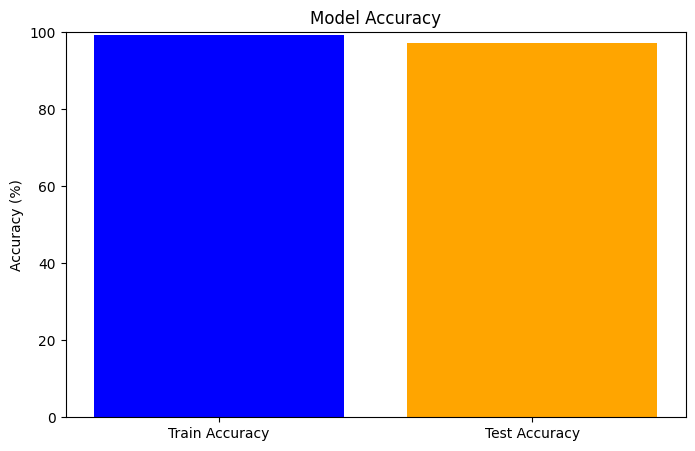

In [370]:
accuracies = {'Train Accuracy': train_accuracy * 100, 'Test Accuracy': test_accuracy * 100}

plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

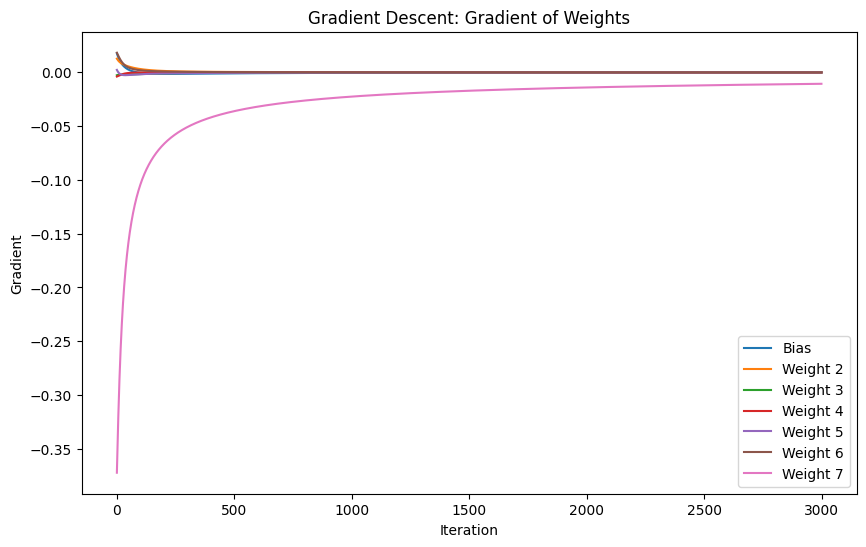

In [371]:
gradients = np.array(gradients)
plt.figure(figsize=(10, 6))

for i in range(gradients.shape[1]):
    plt.plot(gradients[:, i], label=f'Weight {i + 1}' if i != 0 else 'Bias')

plt.title('Gradient Descent: Gradient of Weights')
plt.xlabel('Iteration')
plt.ylabel('Gradient')
plt.legend()
plt.show()